Home Credit Business Problem 
Home Credit Company is a ﬁnancial institution with a passion to help marginalized unbanked population due to insufficient or non-existent credit histories. The company was interested in providing a positive and safe borrowing experience to this group. In the process, the company had tried to predict their clients repayment abilities to make repayments by obtaining a variety of alternative data from telco and transactional information. Although the company is exploring data science methods, to use statistical and machine learning methods to make predictions, they were ﬁnding it challenging and needed help from data scientist like Kagglers to help them unlock the full potential of their data. 
Benefits  of a solution: When this company fully obtains the expertise or the means to apply statistical and machine learning methods to make predictions, they will be able to process accurate decisions to ensure that their clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful. 
Analytics Approach:  A model to determine the probability of clients to default will be used for the evaluation and prediction of clients worthiness to obtain new loans. 
A supervised approach will be used to address the problem as classification. 
A classification model will be delivered on December 7. 

## Questions to guide your exploration:





## Task 1: Explore the target variable

### Target Variable Exploration

What is the distribution of the TARGET variable?

Is the dataset imbalanced between default and no-default?

What would the accuracy be for a majority class classifier?

Are there any patterns in TARGET across demographic features (e.g., gender, age)?

### Feature Relationships

Which features show strong correlation with TARGET?

How do income, employment duration, and credit amount differ between defaulters and non-defaulters?

Are there nonlinear relationships between predictors and TARGET?

Which features have the most predictive power based on box plots or density plots?

### Data Quality and Cleaning

Which columns have missing values, and how extensive is the missingness?

Are there columns with near-zero or zero variance?

Are there outliers that distort the distribution?

Do any values seem implausible (e.g., negative income, extreme ages)?

Should missing values be imputed, and if so, how?

### Data Quality and Cleaning

Which columns have missing values, and how extensive is the missingness?

Are there columns with near-zero or zero variance?

Are there outliers that distort the distribution?

Do any values seem implausible (e.g., negative income, extreme ages)?

Should missing values be imputed, and if so, how?


In [2]:
import pandas as pd
import numpy as np

# Replace with your actual file path
train_df = pd.read_csv(r"C:\Users\sina_\OneDrive\Documents\University of utah cybersecurity\capstone 2\application_train.csv")


# Preview the data
train_df.head()



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:

target_counts = train_df['TARGET'].value_counts(normalize=True)

print(target_counts)


TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


### Only about 8% of applicants defaulted, while the remaining 92% repaid their loans. The data is unbalanced with respect to the target.

In [7]:
majority_class_accuracy = target_counts[0]  # ≈ 91.9%

accuracy = proportion of class 0 = 282686 / 307511 ≈ 0.919 ≈ 92%
### The accuracy for a simple model consisting in a majority class classifier would always predict class 0.


## Task 2: Analysis of the relationships between predictors and the TARGET variable in Home Credit dataset

Step 1: Define Feature List

In [4]:
selected_features = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'DAYS_EMPLOYED', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'HOUR_APPR_PROCESS_START', 'APARTMENTS_AVG']


Step 2: Summary Statistics by TARGET

In [5]:
summary_stats = train_df.groupby('TARGET')[selected_features].mean().T # Groups the data by TARGET (0 = No Default, 1 = Default), then calculates the mean of each selected feature for each group.Transposes the result so that features become rows and target classes become columns.
summary_stats.columns = ['No Default (0)', 'Default (1)'] # Renames the columns for clarity
summary_stats['Difference'] = summary_stats['Default (1)'] - summary_stats['No Default (0)'] #Adds a new column called Difference. This shows how much higher or lower the average value is for defaulters compared to non-defaulters.Positive values → higher in defaulters; negative values → higher in non-defaulters.
summary_stats.sort_values(by='Difference', ascending=False) # Sorts the table by the Difference column.Features with the largest positive difference (i.e., higher in defaulters) appear at the top.



,No Default (0),Default (1),Difference
DAYS_REGISTRATION,-5029.941065,-4487.127009,542.814056
DAYS_LAST_PHONE_CHANGE,-976.388294,-808.796818,167.591477
REGION_RATING_CLIENT,2.043578,2.153635,0.110057
CNT_CHILDREN,0.412946,0.463807,0.050861
CNT_FAM_MEMBERS,2.150154,2.181269,0.031115
APARTMENTS_AVG,0.118314,0.105766,-0.012547
EXT_SOURCE_2,0.523479,0.410935,-0.112544
EXT_SOURCE_1,0.511461,0.386968,-0.124493
EXT_SOURCE_3,0.520969,0.390717,-0.130252
HOUR_APPR_PROCESS_START,12.086807,11.797100,-0.289707


Step 3: find numeric features most correlated with TARGET 

In [6]:
train_df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False).head(10)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

#### From the exploration of the selected variables for both TARGET =1 and TARGET = 0 clients, some predictors like DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE, AMT_ANNUITY, AMT_INCOME_TOTAL, DAYS_EMPLOYED,AMT_CREDIT, and  AMT_GOODS_PRICE showed stronger differences.
#### This may pinpoint to variables that could be valuable in a predictive model. In the correlation exploration,none of the numeric features showed any strong correlation to the TARGET variable.

## Task 3

Feature Exploration: AI vs. Human

Top 15–20 Semantically Predictive Features
Feature Name	Why It Matters
EXT_SOURCE_1/2/3	External credit scores from other institutions—strong indicators of risk
DAYS_EMPLOYED	Longer employment suggests financial stability
AMT_INCOME_TOTAL	Higher income generally correlates with repayment ability
AMT_CREDIT	Size of the loan—larger loans may carry more risk
AMT_ANNUITY	Monthly repayment amount—can indicate affordability
AMT_GOODS_PRICE	Value of goods purchased—may reflect financial behavior
NAME_CONTRACT_TYPE	Type of loan (Cash vs. Revolving)—risk profiles differ
NAME_EDUCATION_TYPE	Education level—often tied to income and financial literacy
NAME_INCOME_TYPE	Source of income—pensioners vs. salaried vs. unemployed
OCCUPATION_TYPE	Job category—some occupations are more stable than others
CNT_CHILDREN	Number of dependents—affects financial burden
CNT_FAM_MEMBERS	Family size—similar impact as children
REGION_RATING_CLIENT	Regional credit rating—external socioeconomic factor
FLAG_OWN_CAR	Asset ownership—may indicate financial strength
FLAG_OWN_REALTY	Home ownership—another asset-based indicator
DAYS_BIRTH	Age of applicant—can correlate with risk tolerance and financial maturity
DAYS_REGISTRATION	How long they've been registered—stability proxy
DAYS_LAST_PHONE_CHANGE	Frequent changes may suggest instability
NAME_HOUSING_TYPE	Living situation—owned vs. rented vs. with parents
CODE_GENDER	Gender—may correlate with risk in some contexts (though sensitive to bias)

AI Notes on Selection
•	I prioritized features that reflect financial capacity, stability, and external validation (like credit scores).
•	I included demographic and behavioral indicators that often correlate with creditworthiness.
•	I avoided engineered or statistical features—this is purely based on meaning



### Critique of AI Reasoning

The AI’s reasoning made a lot sence since it is based on typical credit risk principles. It used features that reflect:
•	Financial capacity (e.g., income, credit amount, annuity)
•	Stability (e.g., employment duration, registration days)
•	External validation (e.g., EXT_SOURCE scores)
•	Demographics and assets (e.g., housing type, car ownership

One concern is that the AI included CODE_GENDER, which may introduce bias and should be used cautiously. Also, while the AI avoided engineered features, it could have flagged potential interactions or transformations (e.g., income-to-credit ratio) for future modeling.







## Task 4: Data-Informed Exploration

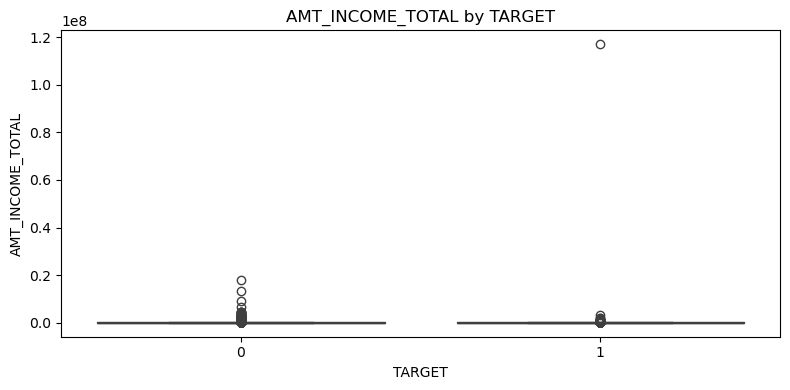

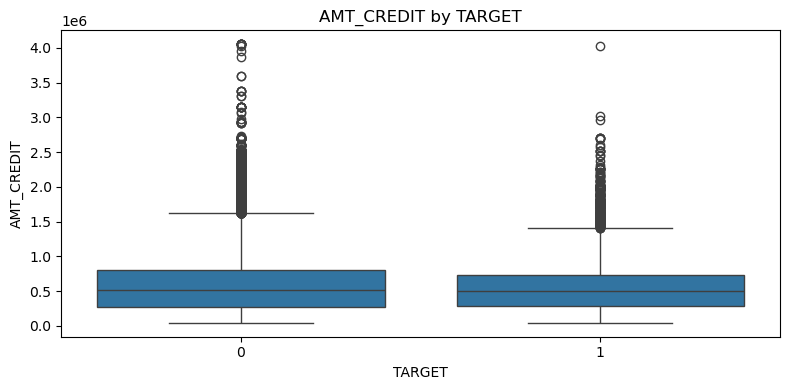

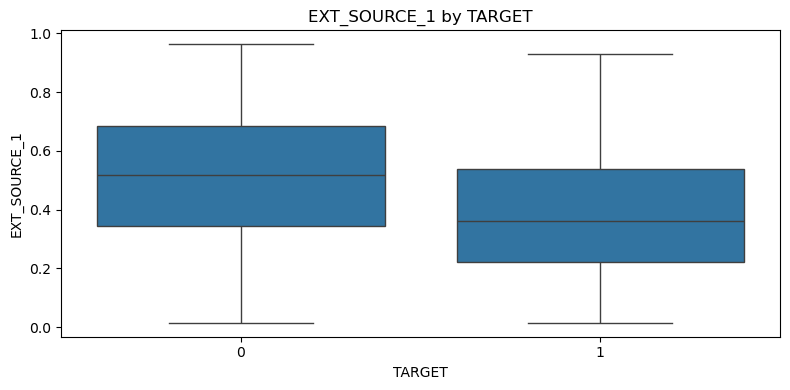

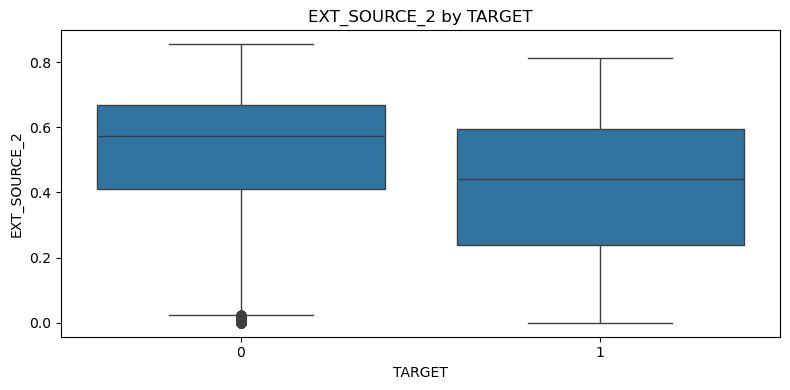

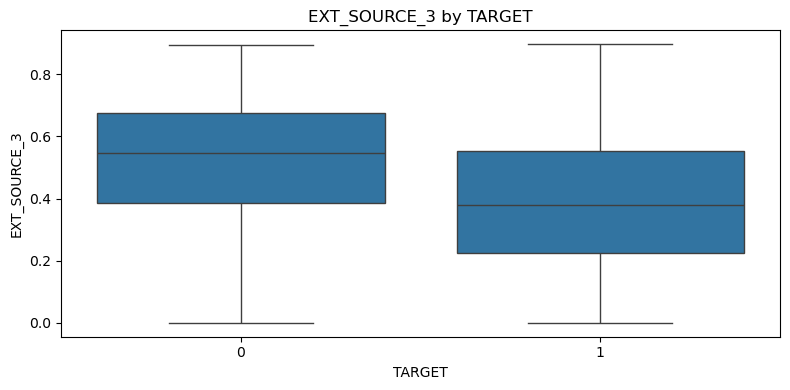

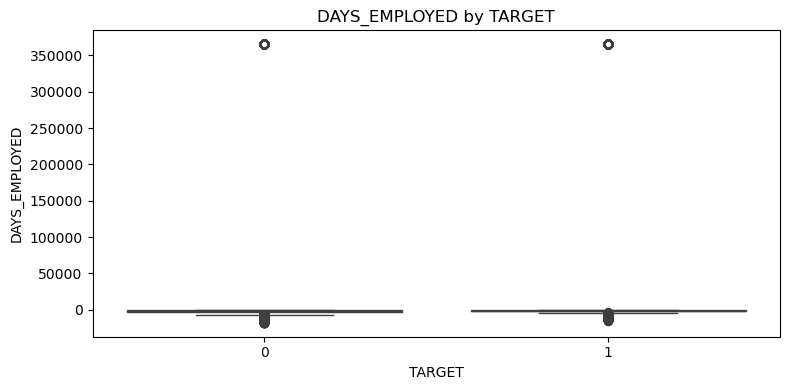

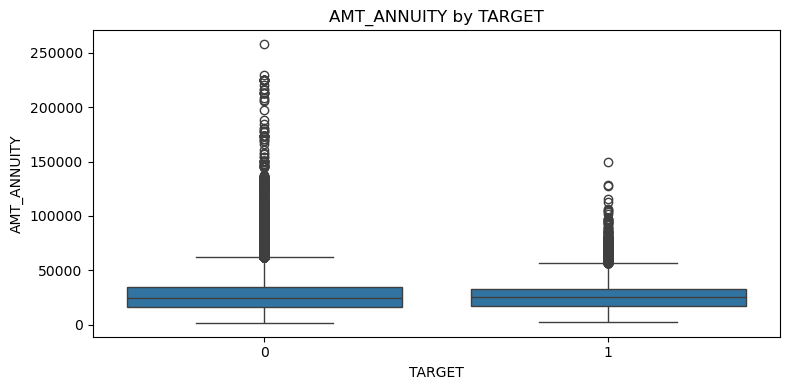

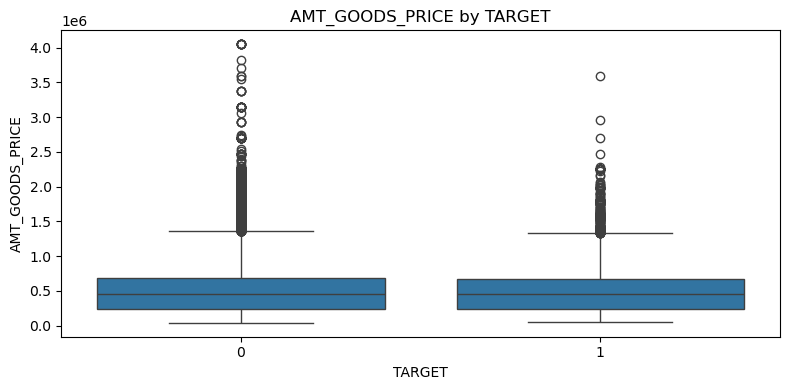

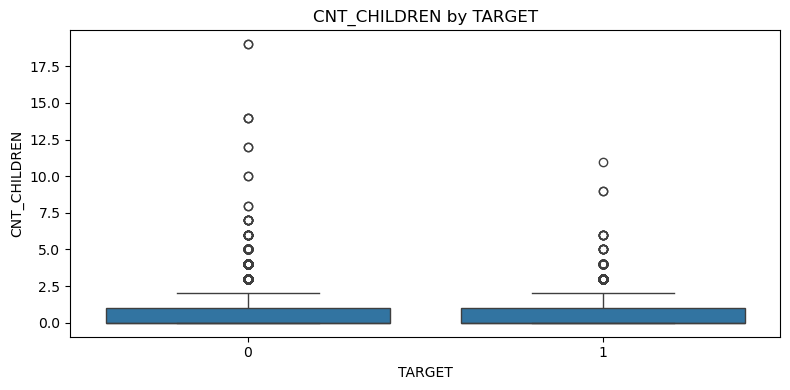

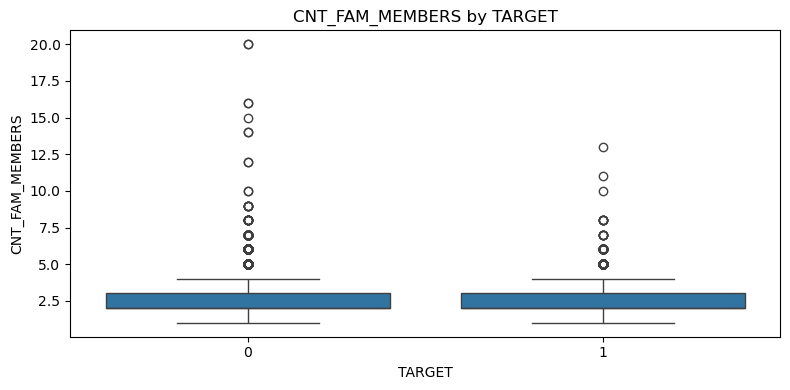

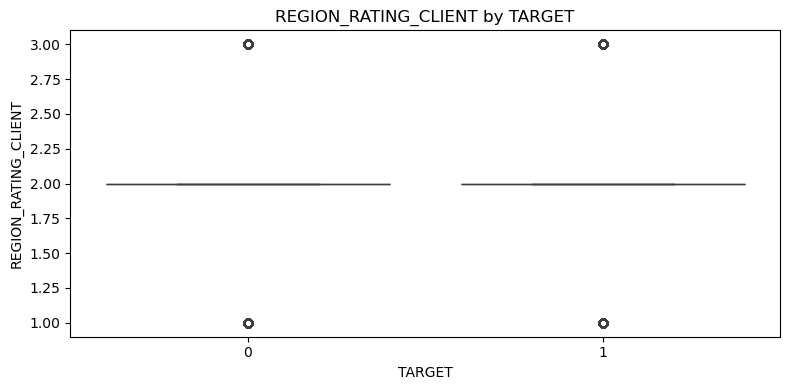

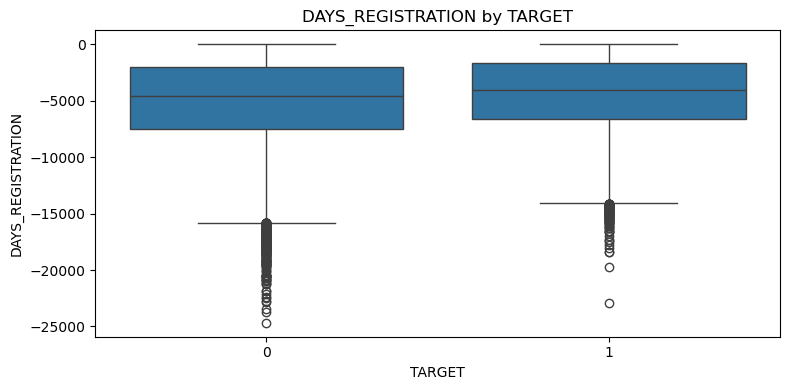

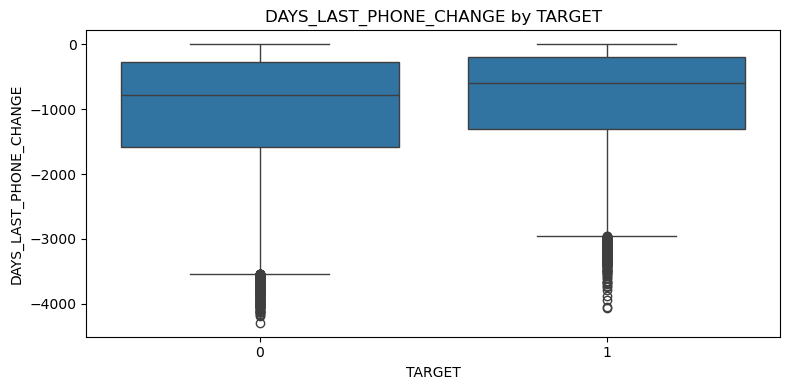

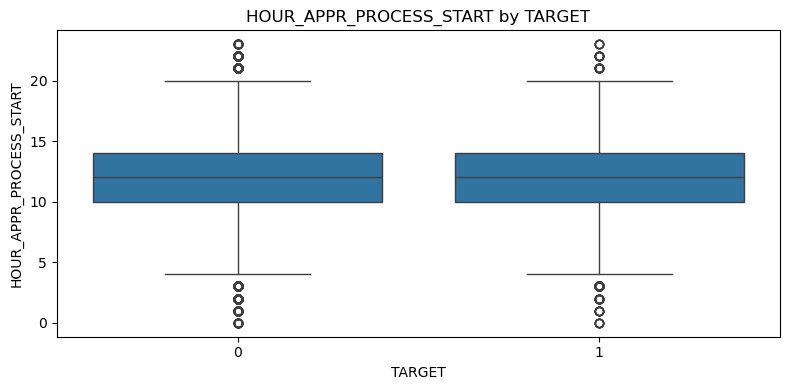

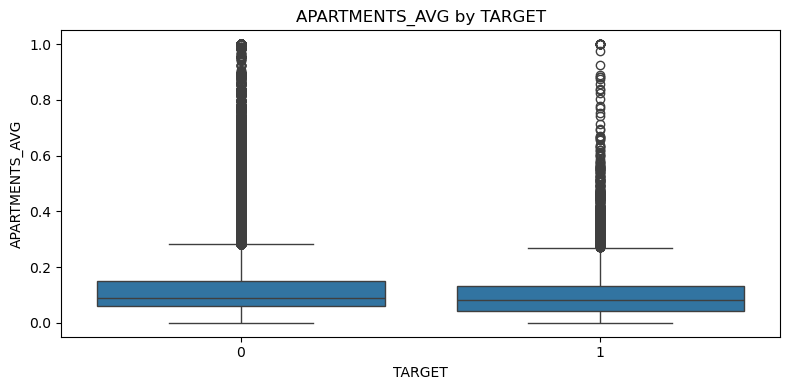

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='TARGET', y=feature, data=train_df)
    plt.title(f'{feature} by TARGET')
    plt.xlabel('TARGET')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


Step 4: Density Plots (KDE) for Distribution Comparison

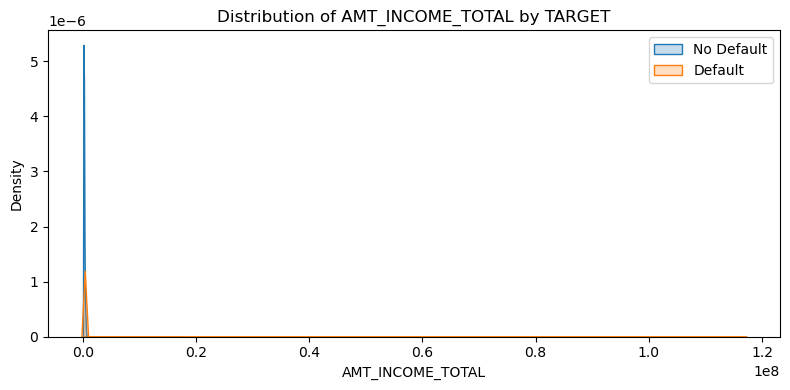

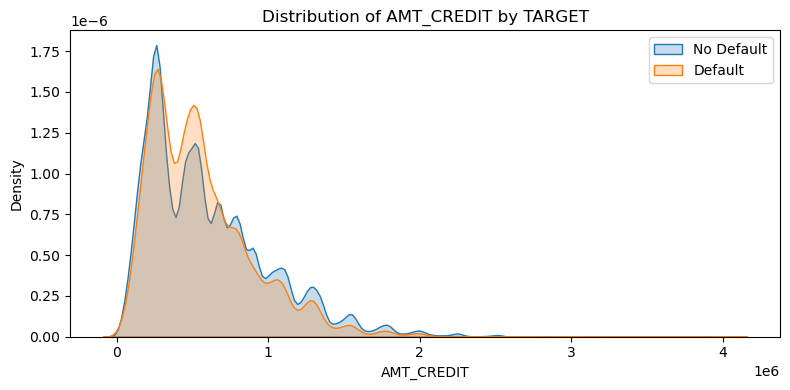

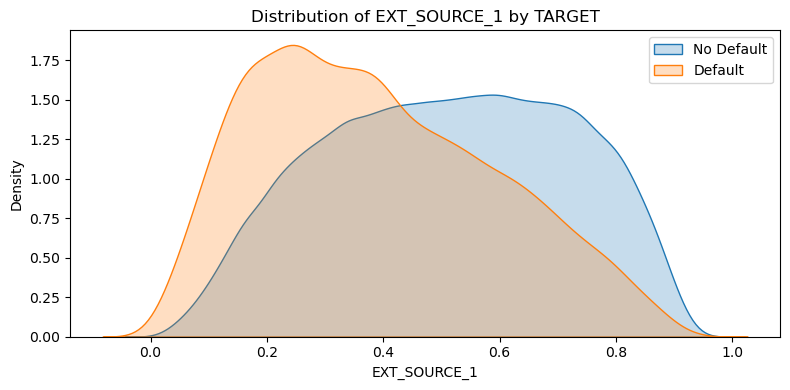

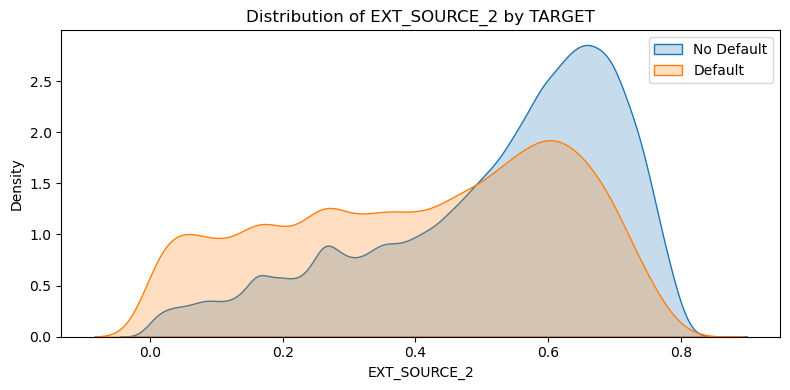

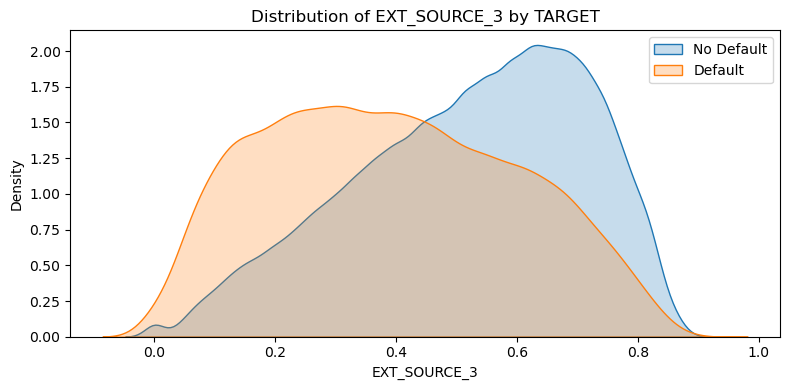

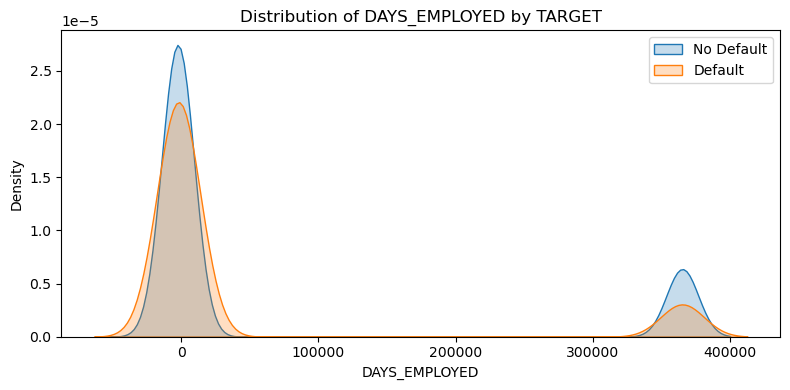

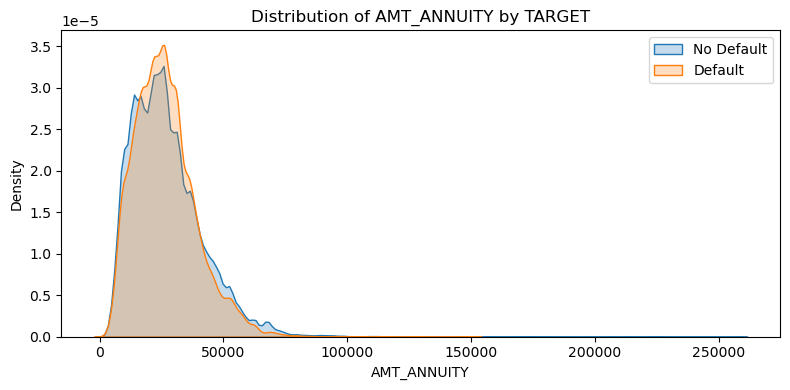

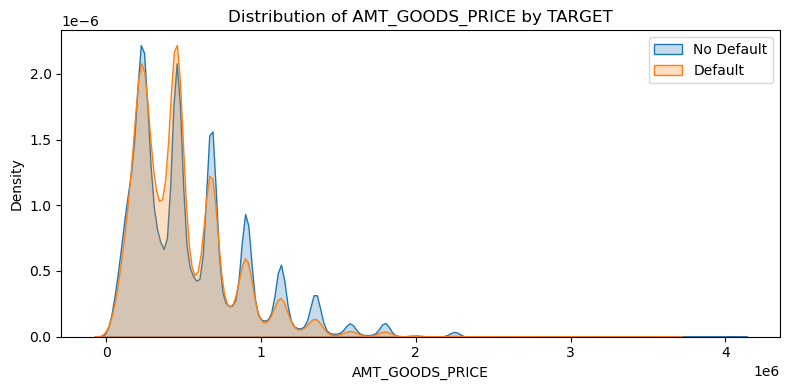

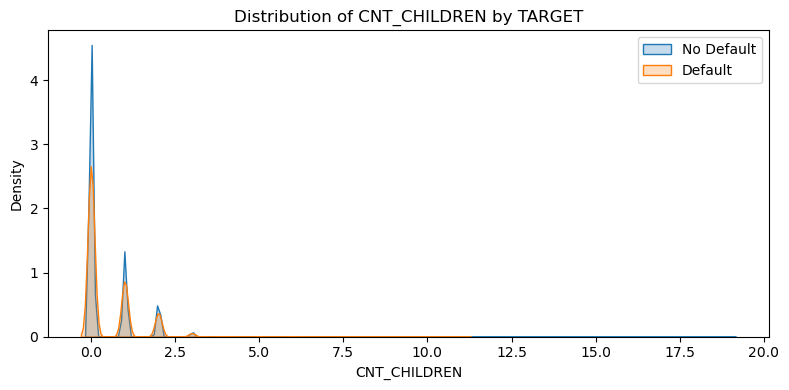

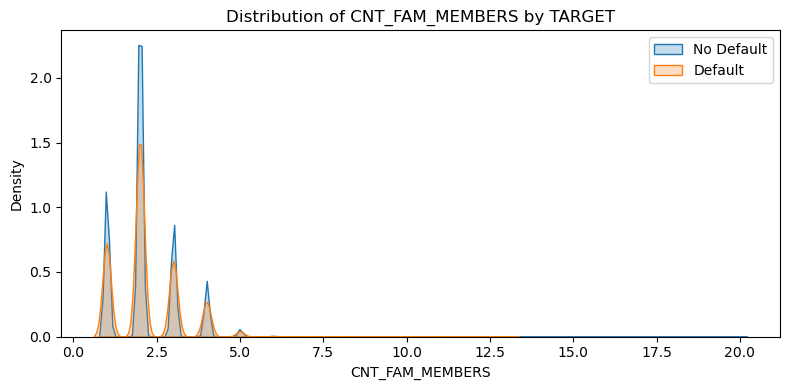

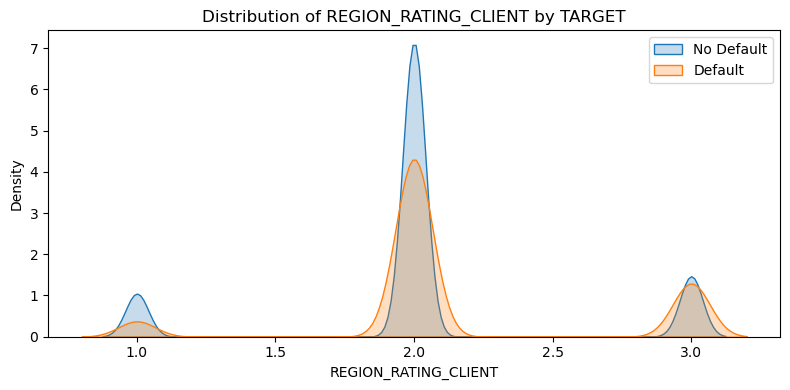

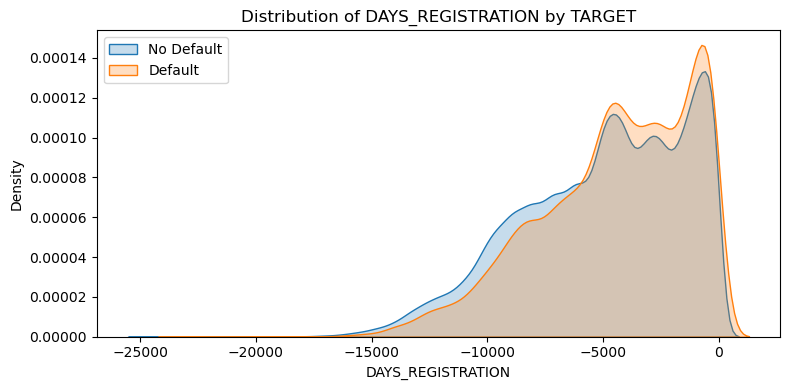

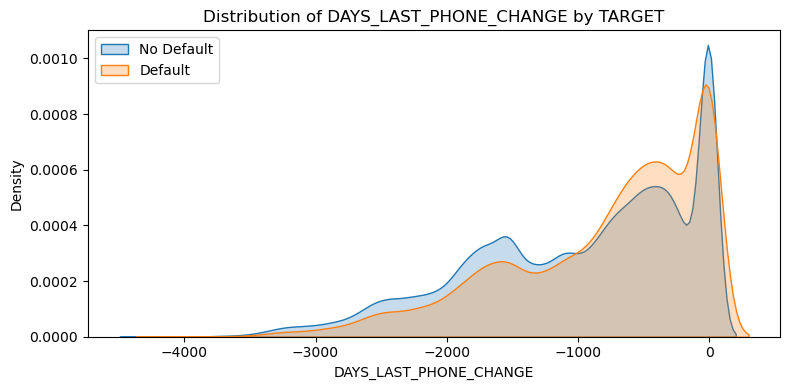

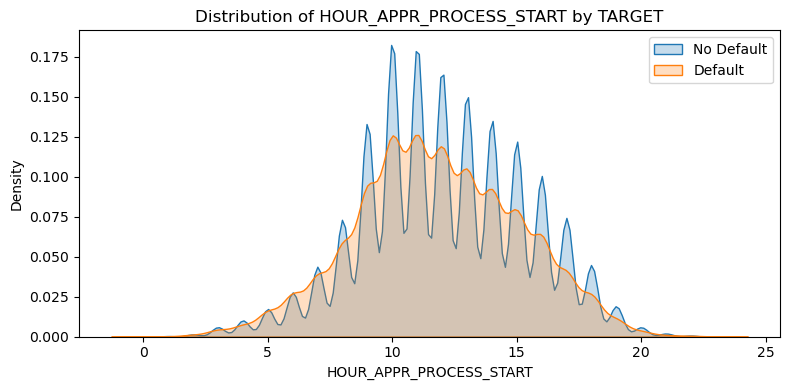

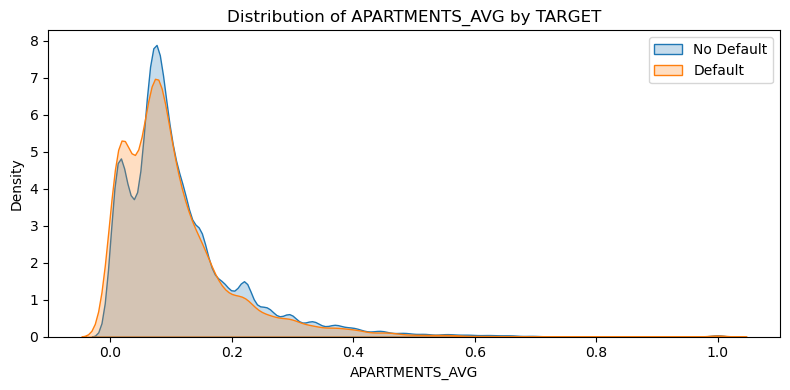

In [34]:
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=train_df[train_df['TARGET'] == 0], x=feature, label='No Default', fill=True)
    sns.kdeplot(data=train_df[train_df['TARGET'] == 1], x=feature, label='Default', fill=True)
    plt.title(f'Distribution of {feature} by TARGET')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()


Correlation with TARGET

In [10]:
train_df[selected_features + ['TARGET']].corr()['TARGET'].sort_values(ascending=False)



TARGET                     1.000000
REGION_RATING_CLIENT       0.058899
DAYS_LAST_PHONE_CHANGE     0.055218
DAYS_REGISTRATION          0.041975
CNT_CHILDREN               0.019187
CNT_FAM_MEMBERS            0.009308
AMT_INCOME_TOTAL          -0.003982
AMT_ANNUITY               -0.012817
HOUR_APPR_PROCESS_START   -0.024166
APARTMENTS_AVG            -0.029498
AMT_CREDIT                -0.030369
AMT_GOODS_PRICE           -0.039645
DAYS_EMPLOYED             -0.044932
EXT_SOURCE_1              -0.155317
EXT_SOURCE_2              -0.160472
EXT_SOURCE_3              -0.178919
Name: TARGET, dtype: float64

list of the top 17 most promising predictors based on the evidence mean difference and correlation, in the data

AMT_ANNUITY
AMT_INCOME_TOTAL			
DAYS_EMPLOYED			
AMT_CREDIT
AMT_GOODS_PRICE
DAYS_REGISTRATION
DAYS_BIRTH                     
REGION_RATING_CLIENT_W_CITY   
REGION_RATING_CLIENT         
DAYS_LAST_PHONE_CHANGE         
DAYS_ID_PUBLISH               
REG_CITY_NOT_WORK_CITY        
FLAG_EMP_PHONE                
REG_CITY_NOT_LIVE_CITY         
FLAG_DOCUMENT_3                
CNT_CHILDREN              
CNT_FAM_MEMBERS            



In [11]:
# Summary statistics for all numeric columns
train_df.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Data-Informed Exploration (Statistical Path) analysis

Box plots showed that some features had clear differences between the default and no-default groups. For example, if a feature’s boxes were far apart, it means that feature might help predict default.

Density plots helped me see overlap. If the curves for default and no-default were very different, that feature is probably useful. If they overlapped a lot, it’s less helpful.

Correlation values gave me a ranked list of features. Features with higher positive or negative correlation with TARGET are more likely to be good predictors.

In the summary statistics, there's evidence for lots of missing data in many of variables since the count is less than the total number of rows for many variables.

Some features like AMT_INCOME_TOTAL or DAYS_EMPLOYED show large gaps between min and max, suggesting outliers or extreme values.

Most values in the TARGET are 0s, indicating great imbalance in the data.

## Task 5

Step 1: Explore Missing Data

In [12]:
missing_data = train_df.isnull().mean().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]  # Only show columns with missing values
missing_data_df = missing_data.to_frame(name='Missing Rate')
missing_data_df['Missing Count'] = train_df.isnull().sum()
missing_data_df.head(20)  
# Top 20 most missing columns



,Missing Rate,Missing Count
COMMONAREA_MEDI,0.698723,214865
COMMONAREA_AVG,0.698723,214865
COMMONAREA_MODE,0.698723,214865
NONLIVINGAPARTMENTS_MODE,0.694330,213514
NONLIVINGAPARTMENTS_AVG,0.694330,213514
NONLIVINGAPARTMENTS_MEDI,0.694330,213514
FONDKAPREMONT_MODE,0.683862,210295
LIVINGAPARTMENTS_MODE,0.683550,210199
LIVINGAPARTMENTS_AVG,0.683550,210199
LIVINGAPARTMENTS_MEDI,0.683550,210199


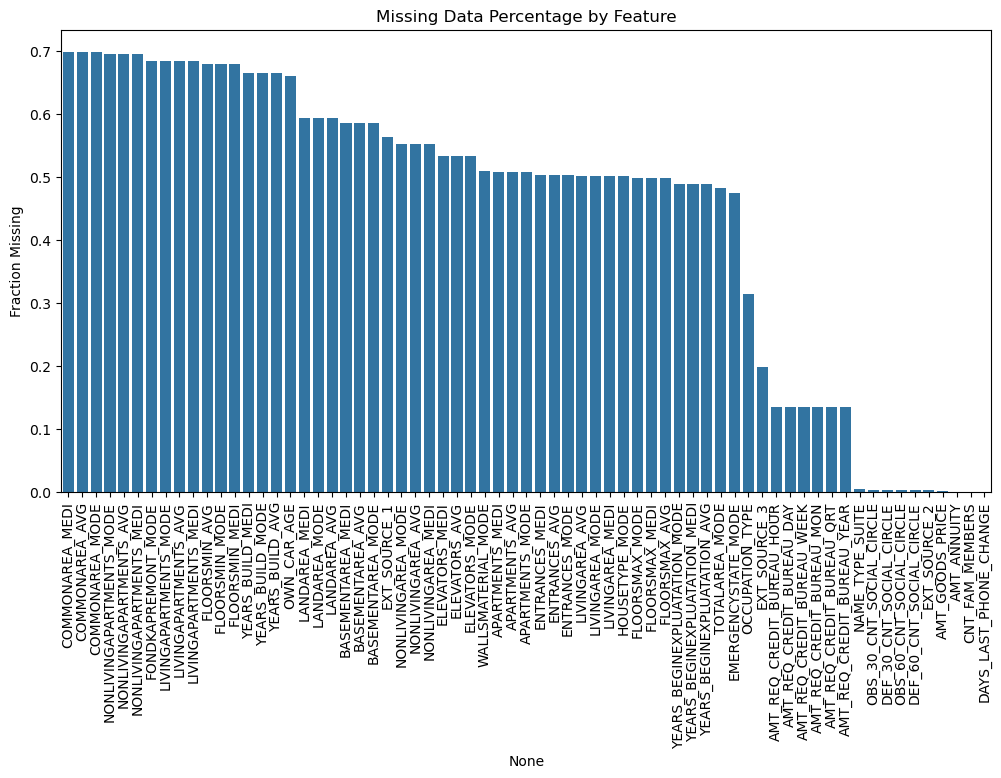

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

missing = train_df.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing[missing > 0].index, y=missing[missing > 0].values)
plt.xticks(rotation=90)
plt.title("Missing Data Percentage by Feature")
plt.ylabel("Fraction Missing")
plt.show()

In [30]:
# Summary statistics

In [13]:
train_df.groupby('TARGET')[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                     'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL',
                     'AMT_CREDIT', 'AMT_ANNUITY']].describe().T.head(40)

TARGET                          0              1
EXT_SOURCE_1  count  1.240790e+05   10054.000000
              mean   5.114612e-01       0.386968
              std    2.088044e-01       0.204729
              min    1.456813e-02       0.014691
              25%    3.454303e-01       0.221847
              50%    5.174516e-01       0.361675
              75%    6.828386e-01       0.537508
              max    9.626928e-01       0.929394
EXT_SOURCE_2  count  2.820780e+05   24773.000000
              mean   5.234787e-01       0.410935
              std    1.862767e-01       0.213107
              min    8.173617e-08       0.000005
              25%    4.097866e-01       0.238568
              50%    5.739047e-01       0.440381
              75%    6.677051e-01       0.594190
              max    8.549997e-01       0.811870
EXT_SOURCE_3  count  2.273980e+05   19148.000000
              mean   5.209690e-01       0.390717
              std    1.904650e-01       0.205810
              min    5.272650e-04       0.000527
              25%    3.859147e-01       0.223831
              50%    5.460232e-01       0.379100
              75%    6.738301e-01       0.553165
              max    8.939761e-01       0.896010
DAYS_BIRTH    count  2.826860e+05   24825.000000
              mean  -1.613818e+04  -14884.828077
              std    4.364201e+03    4192.844583
              min   -2.522900e+04  -25168.000000
              25%   -1.979375e+04  -18037.000000
              50%   -1.587700e+04  -14282.000000
              75%   -1.253600e+04  -11396.000000
              max   -7.489000e+03   -7678.000000
DAYS_EMPLOYED count  2.826860e+05   24825.000000
              mean   6.569615e+04   42394.675448
              std    1.428778e+05  119484.634253
              min   -1.791200e+04  -16069.000000
              25%   -2.813000e+03   -2156.000000
              50%   -1.235000e+03   -1034.000000
              75%   -2.780000e+02    -379.000000
              max    3.652430e+05  365243.000000

### list of the top 17 most promising predictors based on the mean difference and correlation to the TARGET in the data



AMT_ANNUITY
AMT_INCOME_TOTAL			
DAYS_EMPLOYED			
AMT_CREDIT
AMT_GOODS_PRICE
DAYS_REGISTRATION
DAYS_BIRTH                     
REGION_RATING_CLIENT_W_CITY   
REGION_RATING_CLIENT         
DAYS_LAST_PHONE_CHANGE         
DAYS_ID_PUBLISH               
REG_CITY_NOT_WORK_CITY        
FLAG_EMP_PHONE                
REG_CITY_NOT_LIVE_CITY         
FLAG_DOCUMENT_3                
CNT_CHILDREN              
CNT_FAM_MEMBERS            



Data Quality Diagnostic Script (Python, using pandas & sklearn)

In [14]:

from sklearn.feature_selection import VarianceThreshold
df=train_df

# 1. Basic Overview
print("Shape:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head(10))

# 2. Sanity Checks
print("\nUnique values in 'CNT_CHILDREN':", df['CNT_CHILDREN'].unique())
print("\nExtreme values in 'AMT_INCOME_TOTAL':\n", df['AMT_INCOME_TOTAL'].describe())
print("\nSuspicious 'DAYS_EMPLOYED' values:\n", df['DAYS_EMPLOYED'].value_counts().head())
# 3. Outlier Detection (example for income)
z_scores = (df['AMT_INCOME_TOTAL'] - df['AMT_INCOME_TOTAL'].mean()) / df['AMT_INCOME_TOTAL'].std()
outliers = df[np.abs(z_scores) > 3]
print("\nOutliers in income:\n", outliers[['SK_ID_CURR', 'AMT_INCOME_TOTAL']].head())

# 4. Near-Zero Variance Columns
selector = VarianceThreshold(threshold=0.01)
selector.fit(df.select_dtypes(include=[np.number]))
low_variance_cols = df.select_dtypes(include=[np.number]).columns[~selector.get_support()]
print("\nNear-zero variance columns:\n", low_variance_cols.tolist())

# 5. Duplicates
print("\nDuplicate rows:", df.duplicated().sum())
print("\nDuplicate IDs:", df['SK_ID_CURR'].duplicated().sum())

# 6. Placeholder Values
placeholder = 365243
placeholder_cols = [col for col in df.columns if df[col].isin([placeholder]).any()]
print("\nColumns with placeholder 365243:\n", placeholder_cols)

Shape: (307511, 122)

Column types:
 SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

Missing values:
 COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
dtype: int64

Unique values in 'CNT_CHILDREN': [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]

Extreme values in 'AMT_INCOME_TOTAL':
 count    3.07511

### Many of the variables do have high proprotion of missing data up to 70%. Median imputations may be necessary to preserve the data and complete the missing data because it is not liable to outliers. Very large gaps exist between min and max for variables like AMT_INCOME_TOTAL or DAYS_EMPLOYED with possible outliers. This is why the median might be better to replace the missing values. The data has skewed distributions with the mean and median too far apart. The data my need log-transform for modeling. There are lots of Near-zero variance columns

## Task 6: Join application_{train}.csv with transactional data with bureau.csv

In [15]:

# Step 1: Load application and bureau data
app_train = df
bureau = pd.read_csv(r"C:\Users\sina_\OneDrive\Documents\University of utah cybersecurity\capstone 2\bureau.csv")

# Step 2: Aggregate bureau data by applicant ID
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': ['mean', 'max', 'sum'],
    'DAYS_CREDIT': ['min', 'mean'],
    'CREDIT_ACTIVE': lambda x: (x == 'Active').sum(),
    'CREDIT_TYPE': 'nunique'
})

# Step 3: Flatten column names
bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns.values]
bureau_agg.reset_index(inplace=True)

# Step 4: Merge with application data
merged_df = app_train.merge(bureau_agg, on='SK_ID_CURR', how='left')

# Step 5: Select numeric columns
numeric_df = merged_df.select_dtypes(include=[np.number])

# Step 6: Compute correlations with TARGET
correlations = numeric_df.corr()['TARGET'].sort_values(ascending=False)

# Step 7: Display top and bottom correlations
print("\nTop positive correlations with TARGET:\n", correlations.head(10))
print("\nTop negative correlations with TARGET:\n", correlations.tail(10))



Top positive correlations with TARGET:
 TARGET                         1.000000
DAYS_CREDIT_mean               0.089729
DAYS_BIRTH                     0.078239
DAYS_CREDIT_min                0.075248
CREDIT_ACTIVE_<lambda>         0.067128
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

Top negative correlations with TARGET:
 ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


### There are variables from the bureau.csv that showed both moderate positive and negative correlations to the Target.

## Comparative Analysis: AI-Informed vs. Data-Informed Features

| Feature Name                   | In AI List | In Data List | Notes                                                                 |
|-------------------------------|------------|--------------|-----------------------------------------------------------------------|
| AMT_ANNUITY                   | ✅         | ✅           | Monthly repayment amount — strong overlap and agreement               |
| AMT_INCOME_TOTAL              | ✅         | ✅           | Income level — consistently predictive across both approaches         |
| DAYS_EMPLOYED                 | ✅         | ✅           | Employment duration — stability indicator                            |
| AMT_CREDIT                    | ✅         | ✅           | Loan amount — larger loans may carry more risk                        |
| AMT_GOODS_PRICE               | ✅         | ✅           | Purchase value — reflects financial behavior                          |
| DAYS_REGISTRATION             | ✅         | ✅           | Proxy for applicant stability                                         |
| DAYS_BIRTH                    | ✅         | ✅           | Age — linked to maturity and risk tolerance                           |
| REGION_RATING_CLIENT          | ✅         | ✅           | External socioeconomic rating — strong contextual signal              |
| REGION_RATING_CLIENT_W_CITY   | ❌         | ✅           | More granular regional rating — picked up by data but not AI          |
| DAYS_LAST_PHONE_CHANGE        | ✅         | ✅           | Instability proxy — frequent changes may signal risk                  |
| DAYS_ID_PUBLISH               | ❌         | ✅           | ID issuance timing — picked up by data, not emphasized by AI          |
| REG_CITY_NOT_WORK_CITY        | ❌         | ✅           | Geographic mismatch — may signal instability                          |
| FLAG_EMP_PHONE                | ❌         | ✅           | Employment phone flag — possibly linked to verification               |
| REG_CITY_NOT_LIVE_CITY        | ❌         | ✅           | Another mismatch indicator — not flagged by AI                        |
| FLAG_DOCUMENT_3               | ❌         | ✅           | Document flag — may reflect verification status                       |
| CNT_CHILDREN                  | ✅         | ✅           | Financial burden — consistent across both lists                       |
| CNT_FAM_MEMBERS               | ✅         | ✅           | Household size — similar impact as children                           |
| EXT_SOURCE_1/2/3              | ✅         | ❌           | External credit scores — highly predictive but not in your data list  |
| NAME_CONTRACT_TYPE            | ✅         | ❌           | Loan type — AI sees semantic value, not flagged by data               |
| NAME_EDUCATION_TYPE           | ✅         | ❌           | Education — AI sees predictive potential, not in top data features    |
| NAME_INCOME_TYPE              | ✅         | ❌           | Income source — AI emphasizes semantic risk differences               |
| OCCUPATION_TYPE               | ✅         | ❌           | Job category — AI sees stability signal                               |
| FLAG_OWN_CAR                  | ✅         | ❌           | Asset ownership — AI sees financial strength                          |
| FLAG_OWN_REALTY               | ✅         | ❌           | Home ownership — similar asset signal                                 |
| NAME_HOUSING_TYPE             | ✅         | ❌           | Living situation — AI sees behavioral signal                          |
| CODE_GENDER                   | ✅         | ❌           | Gender — flagged by AI but sensitive to bias                          |


In [20]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# ----------------------------
# 4. Fill missing numeric values with median
# ----------------------------
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].median())

# ----------------------------
# 5. Correlation with TARGET
# ----------------------------
correlations = merged_df[numeric_cols].corr()['TARGET'].sort_values(ascending=False)

print("\nTop positive correlations with TARGET:\n", correlations.head(10))
print("\nTop negative correlations with TARGET:\n", correlations.tail(10))

# ----------------------------
# 6. Train/Validation Split
# ----------------------------
X = merged_df.drop(columns=['TARGET'])
y = merged_df['TARGET']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 7. Cross-Validation Example
# ----------------------------
# Use only numeric features for modeling
X_model = X.select_dtypes(include=[np.number])

model = LogisticRegression(max_iter=1000)

# Stratified K-Fold CV (better for imbalanced data)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_model, y, cv=skf, scoring='roc_auc')

print("\nCross-validation AUC scores:", cv_scores)
print("Mean AUC:", cv_scores.mean())



Top positive correlations with TARGET:
 TARGET                         1.000000
DAYS_CREDIT_mean               0.082079
DAYS_BIRTH                     0.078239
DAYS_CREDIT_min                0.067388
REGION_RATING_CLIENT_W_CITY    0.060893
CREDIT_ACTIVE_<lambda>         0.060544
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

Top negative correlations with TARGET:
 ELEVATORS_AVG                -0.035853
REGION_POPULATION_RELATIVE   -0.037227
FLOORSMAX_MODE               -0.038377
FLOORSMAX_MEDI               -0.039157
FLOORSMAX_AVG                -0.039385
AMT_GOODS_PRICE              -0.039623
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.098887
EXT_SOURCE_3                 -0.155892
EXT_SOURCE_2                 -0.160295
Name: TARGET, dtype: float64


C:\Users\sina_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sina_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


Cross-validation AUC scores: [0.63337703 0.63780468 0.63294957 0.6432824  0.63954151]
Mean AUC: 0.637391038280088


C:\Users\sina_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ----------------------------
# 1. Use only numeric features
# ----------------------------
X_model = X.select_dtypes(include=[np.number])
y_model = y

# ----------------------------
# 2. Build pipeline: scaling + logistic regression
# ----------------------------
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # standardize features
    ('logreg', LogisticRegression(
        max_iter=5000,             # allow more iterations
        solver='lbfgs',            # stable solver
        C=1.0                      # regularization strength (default)
    ))
])

# ----------------------------
# 3. Cross-validation
# ----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_model, y_model, cv=skf, scoring='roc_auc')

print("\nCross-validation AUC scores:", cv_scores)
print("Mean AUC:", cv_scores.mean())



Cross-validation AUC scores: [0.73145132 0.73968542 0.73461788 0.74181484 0.73035333]
Mean AUC: 0.7355845599096575


Join application_test.csv with bureau.csv

In [7]:

# 1. Load test data and bureau
# ----------------------------
app_test = pd.read_csv(r"C:\Users\sina_\OneDrive\Documents\University of utah cybersecurity\capstone 2\application_test.csv")
bureau = pd.read_csv(r"C:\Users\sina_\OneDrive\Documents\University of utah cybersecurity\capstone 2\bureau.csv")

# ----------------------------
# 2. Aggregate bureau features (same as train)
# ----------------------------
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': ['mean', 'max', 'sum'],
    'DAYS_CREDIT': ['min', 'mean'],
    'CREDIT_ACTIVE': lambda x: (x == 'Active').sum(),
    'CREDIT_TYPE': 'nunique'
})

# Flatten column names
bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns.values]
bureau_agg.reset_index(inplace=True)

# ----------------------------
# 3. Merge with application_test
# ----------------------------
merged_test = app_test.merge(bureau_agg, on='SK_ID_CURR', how='left')

# ----------------------------
# 4. Fill missing numeric values with median
# ----------------------------
numeric_cols_test = merged_test.select_dtypes(include=[np.number]).columns
merged_test[numeric_cols_test] = merged_test[numeric_cols_test].fillna(merged_test[numeric_cols_test].median())

print("Merged test shape:", merged_test.shape)
print("Sample rows:\n", merged_test.head())


Merged test shape: (48744, 128)
Sample rows:
    SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... AMT_REQ_C

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

# ----------------------------
# 1. Load train/test datasets
# ----------------------------
app_train = pd.read_csv(r"C:\Users\sina_\OneDrive\Documents\University of utah cybersecurity\capstone 2\application_train.csv")
app_test = pd.read_csv(r"C:\Users\sina_\OneDrive\Documents\University of utah cybersecurity\capstone 2\application_test.csv")
bureau = pd.read_csv(r"C:\Users\sina_\OneDrive\Documents\University of utah cybersecurity\capstone 2\bureau.csv")

# ----------------------------
# 2. Aggregate bureau features
# ----------------------------
bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT_SUM': ['mean', 'max', 'sum'],
    'DAYS_CREDIT': ['min', 'mean'],
    'CREDIT_ACTIVE': lambda x: (x == 'Active').sum(),
    'CREDIT_TYPE': 'nunique'
})
bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns.values]
bureau_agg.reset_index(inplace=True)

# ----------------------------
# 3. Merge with train/test
# ----------------------------
train_merged = app_train.merge(bureau_agg, on='SK_ID_CURR', how='left')
test_merged  = app_test.merge(bureau_agg, on='SK_ID_CURR', how='left')

# ----------------------------
# 4. Fill missing numeric values with median
# ----------------------------
numeric_cols_train = train_merged.select_dtypes(include=[np.number]).columns
numeric_cols_test  = test_merged.select_dtypes(include=[np.number]).columns

train_merged[numeric_cols_train] = train_merged[numeric_cols_train].fillna(train_merged[numeric_cols_train].median())
test_merged[numeric_cols_test]   = test_merged[numeric_cols_test].fillna(test_merged[numeric_cols_test].median())

# ----------------------------
# 5. Define features and target
# ----------------------------
X = train_merged.select_dtypes(include=[np.number]).drop(columns=['TARGET'])
y = train_merged['TARGET']

# Align test features with train
X_test = test_merged[X.columns]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 6. Train/Validation Split
# ----------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 7. Logistic Regression Model
# ----------------------------
model = LogisticRegression(max_iter=5000, solver='saga', C=0.5, n_jobs=-1)
model.fit(X_train, y_train)

# ----------------------------
# 8. Standard Metrics on Validation
# ----------------------------
y_valid_pred = model.predict(X_valid)
y_valid_proba = model.predict_proba(X_valid)[:,1]

print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Validation AUC:", roc_auc_score(y_valid, y_valid_proba))
print("Validation Log Loss:", log_loss(y_valid, y_valid_proba))

# ----------------------------
# 9. Cross-Validation AUC
# ----------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='roc_auc')
print("\nCross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", cv_scores.mean())

# ----------------------------
# 10. Kaggle Submission File
# ----------------------------
test_preds = model.predict_proba(X_test_scaled)[:,1]

submission = pd.DataFrame({
    'SK_ID_CURR': test_merged['SK_ID_CURR'],
    'TARGET': test_preds
})

submission.to_csv("submission.csv", index=False)
print("\nSubmission file created: submission.csv")


KeyboardInterrupt: 